In [1]:
from __future__ import print_function, division

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import os
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import utils

In [2]:
print(torch.__version__)

0.4.0


In [6]:
batchsize=128
epoch_num=10000
learning_rate=0.0005

In [ ]:
transform_train = transforms.Compose([
    transforms.RandomCrop(24),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_test = transforms.Compose([
    transforms.CenterCrop(24),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='~/eunbi', train=True, transform=transform_train)
trainloader = DataLoader(trainset, batch_size=batchsize, shuffle=True, num_workers=4)


testset = torchvision.datasets.CIFAR10(root='~/eunbi', train=False, transform=transform_test)
testloader = DataLoader(testset, batch_size=batchsize, shuffle=False, num_workers=4)

In [ ]:
num_classes = 10
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

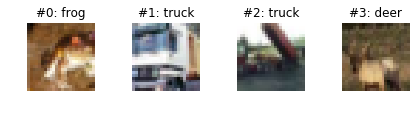

In [7]:
plt.ion()
fig = plt.figure()

for i in range(4):
    image, label = trainset[i]

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('#{}: {}'.format(i, classes[label]))
    ax.axis('off')

    image = image / 2 + 0.5     # unnormalize
    npimage = image.numpy()
    npimage = np.transpose(npimage, (1, 2, 0))
    plt.imshow(npimage)
    
image = image.unsqueeze(0)

In [8]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [9]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, stride=1, kernel_size=1)
        self.conv2 = nn.Conv2d(32, 10, kernel_size=3)
        self.conv3 = nn.Conv2d(10, 20, kernel_size=2)
        self.conv4 = nn.Conv2d(20, 40, kernel_size=3)
        self.conv5 = nn.Conv2d(40, 30, kernel_size=2)
        self.mp = nn.MaxPool2d(2, padding=1, stride=1)
        self.fc1 = nn.Linear(15870, 60)           # 500 can be changed
        self.fc2 = nn.Linear(60, 30)
        self.fc3 = nn.Linear(30, 10)
        
    def forward(self, x):
        in_size = x.size(0)
        x = self.mp(F.relu(self.conv1(x)))
        x = self.mp(F.relu(self.conv2(x)))
        x = self.mp(F.relu(self.conv3(x)))
        x = self.mp(F.relu(self.conv4(x)))
        x = self.mp(F.relu(self.conv5(x)))
        x = x.view(in_size, -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    
net = Net()

if torch.cuda.is_available():
    net.to(device)

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [11]:
#Training the network


if torch.cuda.is_available():
    for epoch in range(epoch_num):  
        for i,(images, labels) in enumerate(trainloader):
            images=images.to(device)
            labels=labels.to(device)
            
            optimizer.zero_grad()

            #Forward Backward Optimize
            outputs = net(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            if i%1000==0:
                print('Number of epochs: %d, Mini Batch order: %d' %(epoch+1,i))
                #torch.save(model,'./cifar_model.pkl')              
else:
    for epoch in range(epoch_num):  
        for i, data in enumerate(trainloader,0):
            inputs, labels = data 
            
            optimizer.zero_grad()

            #Forward Backward Optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

                # print statistics
            if i%1000==0:
                print('Number of epochs: %d, Per Batch: %d' %(epoch+1,i))
                #torch.save(model,'./cifar_model.pkl')

print('Finished Training')

Number of epochs: 1, Mini Batch order: 0
Number of epochs: 2, Mini Batch order: 0
Number of epochs: 3, Mini Batch order: 0
Number of epochs: 4, Mini Batch order: 0
Number of epochs: 5, Mini Batch order: 0
Number of epochs: 6, Mini Batch order: 0
Number of epochs: 7, Mini Batch order: 0
Number of epochs: 8, Mini Batch order: 0
Number of epochs: 9, Mini Batch order: 0
Number of epochs: 10, Mini Batch order: 0
Number of epochs: 11, Mini Batch order: 0
Number of epochs: 12, Mini Batch order: 0
Number of epochs: 13, Mini Batch order: 0
Number of epochs: 14, Mini Batch order: 0
Number of epochs: 15, Mini Batch order: 0
Number of epochs: 16, Mini Batch order: 0
Number of epochs: 17, Mini Batch order: 0
Number of epochs: 18, Mini Batch order: 0
Number of epochs: 19, Mini Batch order: 0
Number of epochs: 20, Mini Batch order: 0
Number of epochs: 21, Mini Batch order: 0
Number of epochs: 22, Mini Batch order: 0
Number of epochs: 23, Mini Batch order: 0
Number of epochs: 24, Mini Batch order: 0
N

Number of epochs: 195, Mini Batch order: 0
Number of epochs: 196, Mini Batch order: 0
Number of epochs: 197, Mini Batch order: 0
Number of epochs: 198, Mini Batch order: 0
Number of epochs: 199, Mini Batch order: 0
Number of epochs: 200, Mini Batch order: 0
Number of epochs: 201, Mini Batch order: 0
Number of epochs: 202, Mini Batch order: 0
Number of epochs: 203, Mini Batch order: 0
Number of epochs: 204, Mini Batch order: 0
Number of epochs: 205, Mini Batch order: 0
Number of epochs: 206, Mini Batch order: 0
Number of epochs: 207, Mini Batch order: 0
Number of epochs: 208, Mini Batch order: 0
Number of epochs: 209, Mini Batch order: 0
Number of epochs: 210, Mini Batch order: 0
Number of epochs: 211, Mini Batch order: 0
Number of epochs: 212, Mini Batch order: 0
Number of epochs: 213, Mini Batch order: 0
Number of epochs: 214, Mini Batch order: 0
Number of epochs: 215, Mini Batch order: 0
Number of epochs: 216, Mini Batch order: 0
Number of epochs: 217, Mini Batch order: 0
Number of e

Number of epochs: 386, Mini Batch order: 0
Number of epochs: 387, Mini Batch order: 0
Number of epochs: 388, Mini Batch order: 0
Number of epochs: 389, Mini Batch order: 0
Number of epochs: 390, Mini Batch order: 0
Number of epochs: 391, Mini Batch order: 0
Number of epochs: 392, Mini Batch order: 0
Number of epochs: 393, Mini Batch order: 0
Number of epochs: 394, Mini Batch order: 0
Number of epochs: 395, Mini Batch order: 0
Number of epochs: 396, Mini Batch order: 0
Number of epochs: 397, Mini Batch order: 0
Number of epochs: 398, Mini Batch order: 0
Number of epochs: 399, Mini Batch order: 0
Number of epochs: 400, Mini Batch order: 0
Number of epochs: 401, Mini Batch order: 0
Number of epochs: 402, Mini Batch order: 0
Number of epochs: 403, Mini Batch order: 0
Number of epochs: 404, Mini Batch order: 0
Number of epochs: 405, Mini Batch order: 0
Number of epochs: 406, Mini Batch order: 0
Number of epochs: 407, Mini Batch order: 0
Number of epochs: 408, Mini Batch order: 0
Number of e

Number of epochs: 577, Mini Batch order: 0
Number of epochs: 578, Mini Batch order: 0
Number of epochs: 579, Mini Batch order: 0
Number of epochs: 580, Mini Batch order: 0
Number of epochs: 581, Mini Batch order: 0
Number of epochs: 582, Mini Batch order: 0
Number of epochs: 583, Mini Batch order: 0
Number of epochs: 584, Mini Batch order: 0
Number of epochs: 585, Mini Batch order: 0
Number of epochs: 586, Mini Batch order: 0
Number of epochs: 587, Mini Batch order: 0
Number of epochs: 588, Mini Batch order: 0
Number of epochs: 589, Mini Batch order: 0
Number of epochs: 590, Mini Batch order: 0
Number of epochs: 591, Mini Batch order: 0
Number of epochs: 592, Mini Batch order: 0
Number of epochs: 593, Mini Batch order: 0
Number of epochs: 594, Mini Batch order: 0
Number of epochs: 595, Mini Batch order: 0
Number of epochs: 596, Mini Batch order: 0
Number of epochs: 597, Mini Batch order: 0
Number of epochs: 598, Mini Batch order: 0
Number of epochs: 599, Mini Batch order: 0
Number of e

Number of epochs: 768, Mini Batch order: 0
Number of epochs: 769, Mini Batch order: 0
Number of epochs: 770, Mini Batch order: 0
Number of epochs: 771, Mini Batch order: 0
Number of epochs: 772, Mini Batch order: 0
Number of epochs: 773, Mini Batch order: 0
Number of epochs: 774, Mini Batch order: 0
Number of epochs: 775, Mini Batch order: 0
Number of epochs: 776, Mini Batch order: 0
Number of epochs: 777, Mini Batch order: 0
Number of epochs: 778, Mini Batch order: 0
Number of epochs: 779, Mini Batch order: 0
Number of epochs: 780, Mini Batch order: 0
Number of epochs: 781, Mini Batch order: 0
Number of epochs: 782, Mini Batch order: 0
Number of epochs: 783, Mini Batch order: 0
Number of epochs: 784, Mini Batch order: 0
Number of epochs: 785, Mini Batch order: 0
Number of epochs: 786, Mini Batch order: 0
Number of epochs: 787, Mini Batch order: 0
Number of epochs: 788, Mini Batch order: 0
Number of epochs: 789, Mini Batch order: 0
Number of epochs: 790, Mini Batch order: 0
Number of e

Number of epochs: 959, Mini Batch order: 0
Number of epochs: 960, Mini Batch order: 0
Number of epochs: 961, Mini Batch order: 0
Number of epochs: 962, Mini Batch order: 0
Number of epochs: 963, Mini Batch order: 0
Number of epochs: 964, Mini Batch order: 0
Number of epochs: 965, Mini Batch order: 0
Number of epochs: 966, Mini Batch order: 0
Number of epochs: 967, Mini Batch order: 0
Number of epochs: 968, Mini Batch order: 0
Number of epochs: 969, Mini Batch order: 0
Number of epochs: 970, Mini Batch order: 0
Number of epochs: 971, Mini Batch order: 0
Number of epochs: 972, Mini Batch order: 0
Number of epochs: 973, Mini Batch order: 0
Number of epochs: 974, Mini Batch order: 0
Number of epochs: 975, Mini Batch order: 0
Number of epochs: 976, Mini Batch order: 0
Number of epochs: 977, Mini Batch order: 0
Number of epochs: 978, Mini Batch order: 0
Number of epochs: 979, Mini Batch order: 0
Number of epochs: 980, Mini Batch order: 0
Number of epochs: 981, Mini Batch order: 0
Number of e

Number of epochs: 1147, Mini Batch order: 0
Number of epochs: 1148, Mini Batch order: 0
Number of epochs: 1149, Mini Batch order: 0
Number of epochs: 1150, Mini Batch order: 0
Number of epochs: 1151, Mini Batch order: 0
Number of epochs: 1152, Mini Batch order: 0
Number of epochs: 1153, Mini Batch order: 0
Number of epochs: 1154, Mini Batch order: 0
Number of epochs: 1155, Mini Batch order: 0
Number of epochs: 1156, Mini Batch order: 0
Number of epochs: 1157, Mini Batch order: 0
Number of epochs: 1158, Mini Batch order: 0
Number of epochs: 1159, Mini Batch order: 0
Number of epochs: 1160, Mini Batch order: 0
Number of epochs: 1161, Mini Batch order: 0
Number of epochs: 1162, Mini Batch order: 0
Number of epochs: 1163, Mini Batch order: 0
Number of epochs: 1164, Mini Batch order: 0
Number of epochs: 1165, Mini Batch order: 0
Number of epochs: 1166, Mini Batch order: 0
Number of epochs: 1167, Mini Batch order: 0
Number of epochs: 1168, Mini Batch order: 0
Number of epochs: 1169, Mini Bat

Number of epochs: 1334, Mini Batch order: 0
Number of epochs: 1335, Mini Batch order: 0
Number of epochs: 1336, Mini Batch order: 0
Number of epochs: 1337, Mini Batch order: 0
Number of epochs: 1338, Mini Batch order: 0
Number of epochs: 1339, Mini Batch order: 0
Number of epochs: 1340, Mini Batch order: 0
Number of epochs: 1341, Mini Batch order: 0
Number of epochs: 1342, Mini Batch order: 0
Number of epochs: 1343, Mini Batch order: 0
Number of epochs: 1344, Mini Batch order: 0
Number of epochs: 1345, Mini Batch order: 0
Number of epochs: 1346, Mini Batch order: 0
Number of epochs: 1347, Mini Batch order: 0
Number of epochs: 1348, Mini Batch order: 0
Number of epochs: 1349, Mini Batch order: 0
Number of epochs: 1350, Mini Batch order: 0
Number of epochs: 1351, Mini Batch order: 0
Number of epochs: 1352, Mini Batch order: 0
Number of epochs: 1353, Mini Batch order: 0
Number of epochs: 1354, Mini Batch order: 0
Number of epochs: 1355, Mini Batch order: 0
Number of epochs: 1356, Mini Bat

Number of epochs: 1521, Mini Batch order: 0
Number of epochs: 1522, Mini Batch order: 0
Number of epochs: 1523, Mini Batch order: 0
Number of epochs: 1524, Mini Batch order: 0
Number of epochs: 1525, Mini Batch order: 0
Number of epochs: 1526, Mini Batch order: 0
Number of epochs: 1527, Mini Batch order: 0
Number of epochs: 1528, Mini Batch order: 0
Number of epochs: 1529, Mini Batch order: 0
Number of epochs: 1530, Mini Batch order: 0
Number of epochs: 1531, Mini Batch order: 0
Number of epochs: 1532, Mini Batch order: 0
Number of epochs: 1533, Mini Batch order: 0
Number of epochs: 1534, Mini Batch order: 0
Number of epochs: 1535, Mini Batch order: 0
Number of epochs: 1536, Mini Batch order: 0
Number of epochs: 1537, Mini Batch order: 0
Number of epochs: 1538, Mini Batch order: 0
Number of epochs: 1539, Mini Batch order: 0
Number of epochs: 1540, Mini Batch order: 0
Number of epochs: 1541, Mini Batch order: 0
Number of epochs: 1542, Mini Batch order: 0
Number of epochs: 1543, Mini Bat

Number of epochs: 1708, Mini Batch order: 0
Number of epochs: 1709, Mini Batch order: 0
Number of epochs: 1710, Mini Batch order: 0
Number of epochs: 1711, Mini Batch order: 0
Number of epochs: 1712, Mini Batch order: 0
Number of epochs: 1713, Mini Batch order: 0
Number of epochs: 1714, Mini Batch order: 0
Number of epochs: 1715, Mini Batch order: 0
Number of epochs: 1716, Mini Batch order: 0
Number of epochs: 1717, Mini Batch order: 0
Number of epochs: 1718, Mini Batch order: 0
Number of epochs: 1719, Mini Batch order: 0
Number of epochs: 1720, Mini Batch order: 0
Number of epochs: 1721, Mini Batch order: 0
Number of epochs: 1722, Mini Batch order: 0
Number of epochs: 1723, Mini Batch order: 0
Number of epochs: 1724, Mini Batch order: 0
Number of epochs: 1725, Mini Batch order: 0
Number of epochs: 1726, Mini Batch order: 0
Number of epochs: 1727, Mini Batch order: 0
Number of epochs: 1728, Mini Batch order: 0
Number of epochs: 1729, Mini Batch order: 0
Number of epochs: 1730, Mini Bat

Number of epochs: 1895, Mini Batch order: 0
Number of epochs: 1896, Mini Batch order: 0
Number of epochs: 1897, Mini Batch order: 0
Number of epochs: 1898, Mini Batch order: 0
Number of epochs: 1899, Mini Batch order: 0
Number of epochs: 1900, Mini Batch order: 0
Number of epochs: 1901, Mini Batch order: 0
Number of epochs: 1902, Mini Batch order: 0
Number of epochs: 1903, Mini Batch order: 0
Number of epochs: 1904, Mini Batch order: 0
Number of epochs: 1905, Mini Batch order: 0
Number of epochs: 1906, Mini Batch order: 0
Number of epochs: 1907, Mini Batch order: 0
Number of epochs: 1908, Mini Batch order: 0
Number of epochs: 1909, Mini Batch order: 0
Number of epochs: 1910, Mini Batch order: 0
Number of epochs: 1911, Mini Batch order: 0
Number of epochs: 1912, Mini Batch order: 0
Number of epochs: 1913, Mini Batch order: 0
Number of epochs: 1914, Mini Batch order: 0
Number of epochs: 1915, Mini Batch order: 0
Number of epochs: 1916, Mini Batch order: 0
Number of epochs: 1917, Mini Bat

Number of epochs: 2082, Mini Batch order: 0
Number of epochs: 2083, Mini Batch order: 0
Number of epochs: 2084, Mini Batch order: 0
Number of epochs: 2085, Mini Batch order: 0
Number of epochs: 2086, Mini Batch order: 0
Number of epochs: 2087, Mini Batch order: 0
Number of epochs: 2088, Mini Batch order: 0
Number of epochs: 2089, Mini Batch order: 0
Number of epochs: 2090, Mini Batch order: 0
Number of epochs: 2091, Mini Batch order: 0
Number of epochs: 2092, Mini Batch order: 0
Number of epochs: 2093, Mini Batch order: 0
Number of epochs: 2094, Mini Batch order: 0
Number of epochs: 2095, Mini Batch order: 0
Number of epochs: 2096, Mini Batch order: 0
Number of epochs: 2097, Mini Batch order: 0
Number of epochs: 2098, Mini Batch order: 0
Number of epochs: 2099, Mini Batch order: 0
Number of epochs: 2100, Mini Batch order: 0
Number of epochs: 2101, Mini Batch order: 0
Number of epochs: 2102, Mini Batch order: 0
Number of epochs: 2103, Mini Batch order: 0
Number of epochs: 2104, Mini Bat

Number of epochs: 2269, Mini Batch order: 0
Number of epochs: 2270, Mini Batch order: 0
Number of epochs: 2271, Mini Batch order: 0
Number of epochs: 2272, Mini Batch order: 0
Number of epochs: 2273, Mini Batch order: 0
Number of epochs: 2274, Mini Batch order: 0
Number of epochs: 2275, Mini Batch order: 0
Number of epochs: 2276, Mini Batch order: 0
Number of epochs: 2277, Mini Batch order: 0
Number of epochs: 2278, Mini Batch order: 0
Number of epochs: 2279, Mini Batch order: 0
Number of epochs: 2280, Mini Batch order: 0
Number of epochs: 2281, Mini Batch order: 0
Number of epochs: 2282, Mini Batch order: 0
Number of epochs: 2283, Mini Batch order: 0
Number of epochs: 2284, Mini Batch order: 0
Number of epochs: 2285, Mini Batch order: 0
Number of epochs: 2286, Mini Batch order: 0
Number of epochs: 2287, Mini Batch order: 0
Number of epochs: 2288, Mini Batch order: 0
Number of epochs: 2289, Mini Batch order: 0
Number of epochs: 2290, Mini Batch order: 0
Number of epochs: 2291, Mini Bat

Number of epochs: 2456, Mini Batch order: 0
Number of epochs: 2457, Mini Batch order: 0
Number of epochs: 2458, Mini Batch order: 0
Number of epochs: 2459, Mini Batch order: 0
Number of epochs: 2460, Mini Batch order: 0
Number of epochs: 2461, Mini Batch order: 0
Number of epochs: 2462, Mini Batch order: 0
Number of epochs: 2463, Mini Batch order: 0
Number of epochs: 2464, Mini Batch order: 0
Number of epochs: 2465, Mini Batch order: 0
Number of epochs: 2466, Mini Batch order: 0
Number of epochs: 2467, Mini Batch order: 0
Number of epochs: 2468, Mini Batch order: 0
Number of epochs: 2469, Mini Batch order: 0
Number of epochs: 2470, Mini Batch order: 0
Number of epochs: 2471, Mini Batch order: 0
Number of epochs: 2472, Mini Batch order: 0
Number of epochs: 2473, Mini Batch order: 0
Number of epochs: 2474, Mini Batch order: 0
Number of epochs: 2475, Mini Batch order: 0
Number of epochs: 2476, Mini Batch order: 0
Number of epochs: 2477, Mini Batch order: 0
Number of epochs: 2478, Mini Bat

Number of epochs: 2643, Mini Batch order: 0
Number of epochs: 2644, Mini Batch order: 0
Number of epochs: 2645, Mini Batch order: 0
Number of epochs: 2646, Mini Batch order: 0
Number of epochs: 2647, Mini Batch order: 0
Number of epochs: 2648, Mini Batch order: 0
Number of epochs: 2649, Mini Batch order: 0
Number of epochs: 2650, Mini Batch order: 0
Number of epochs: 2651, Mini Batch order: 0
Number of epochs: 2652, Mini Batch order: 0
Number of epochs: 2653, Mini Batch order: 0
Number of epochs: 2654, Mini Batch order: 0
Number of epochs: 2655, Mini Batch order: 0
Number of epochs: 2656, Mini Batch order: 0
Number of epochs: 2657, Mini Batch order: 0
Number of epochs: 2658, Mini Batch order: 0
Number of epochs: 2659, Mini Batch order: 0
Number of epochs: 2660, Mini Batch order: 0
Number of epochs: 2661, Mini Batch order: 0
Number of epochs: 2662, Mini Batch order: 0
Number of epochs: 2663, Mini Batch order: 0
Number of epochs: 2664, Mini Batch order: 0
Number of epochs: 2665, Mini Bat

Number of epochs: 2830, Mini Batch order: 0
Number of epochs: 2831, Mini Batch order: 0
Number of epochs: 2832, Mini Batch order: 0
Number of epochs: 2833, Mini Batch order: 0
Number of epochs: 2834, Mini Batch order: 0
Number of epochs: 2835, Mini Batch order: 0
Number of epochs: 2836, Mini Batch order: 0
Number of epochs: 2837, Mini Batch order: 0
Number of epochs: 2838, Mini Batch order: 0
Number of epochs: 2839, Mini Batch order: 0
Number of epochs: 2840, Mini Batch order: 0
Number of epochs: 2841, Mini Batch order: 0
Number of epochs: 2842, Mini Batch order: 0
Number of epochs: 2843, Mini Batch order: 0
Number of epochs: 2844, Mini Batch order: 0
Number of epochs: 2845, Mini Batch order: 0
Number of epochs: 2846, Mini Batch order: 0
Number of epochs: 2847, Mini Batch order: 0
Number of epochs: 2848, Mini Batch order: 0
Number of epochs: 2849, Mini Batch order: 0
Number of epochs: 2850, Mini Batch order: 0
Number of epochs: 2851, Mini Batch order: 0
Number of epochs: 2852, Mini Bat

Number of epochs: 3017, Mini Batch order: 0
Number of epochs: 3018, Mini Batch order: 0
Number of epochs: 3019, Mini Batch order: 0
Number of epochs: 3020, Mini Batch order: 0
Number of epochs: 3021, Mini Batch order: 0
Number of epochs: 3022, Mini Batch order: 0
Number of epochs: 3023, Mini Batch order: 0
Number of epochs: 3024, Mini Batch order: 0
Number of epochs: 3025, Mini Batch order: 0
Number of epochs: 3026, Mini Batch order: 0
Number of epochs: 3027, Mini Batch order: 0
Number of epochs: 3028, Mini Batch order: 0
Number of epochs: 3029, Mini Batch order: 0
Number of epochs: 3030, Mini Batch order: 0
Number of epochs: 3031, Mini Batch order: 0
Number of epochs: 3032, Mini Batch order: 0
Number of epochs: 3033, Mini Batch order: 0
Number of epochs: 3034, Mini Batch order: 0
Number of epochs: 3035, Mini Batch order: 0
Number of epochs: 3036, Mini Batch order: 0
Number of epochs: 3037, Mini Batch order: 0
Number of epochs: 3038, Mini Batch order: 0
Number of epochs: 3039, Mini Bat

Number of epochs: 3204, Mini Batch order: 0
Number of epochs: 3205, Mini Batch order: 0
Number of epochs: 3206, Mini Batch order: 0
Number of epochs: 3207, Mini Batch order: 0
Number of epochs: 3208, Mini Batch order: 0
Number of epochs: 3209, Mini Batch order: 0
Number of epochs: 3210, Mini Batch order: 0
Number of epochs: 3211, Mini Batch order: 0
Number of epochs: 3212, Mini Batch order: 0
Number of epochs: 3213, Mini Batch order: 0
Number of epochs: 3214, Mini Batch order: 0
Number of epochs: 3215, Mini Batch order: 0
Number of epochs: 3216, Mini Batch order: 0
Number of epochs: 3217, Mini Batch order: 0
Number of epochs: 3218, Mini Batch order: 0
Number of epochs: 3219, Mini Batch order: 0
Number of epochs: 3220, Mini Batch order: 0
Number of epochs: 3221, Mini Batch order: 0
Number of epochs: 3222, Mini Batch order: 0
Number of epochs: 3223, Mini Batch order: 0
Number of epochs: 3224, Mini Batch order: 0
Number of epochs: 3225, Mini Batch order: 0
Number of epochs: 3226, Mini Bat

Number of epochs: 3391, Mini Batch order: 0
Number of epochs: 3392, Mini Batch order: 0
Number of epochs: 3393, Mini Batch order: 0
Number of epochs: 3394, Mini Batch order: 0
Number of epochs: 3395, Mini Batch order: 0
Number of epochs: 3396, Mini Batch order: 0
Number of epochs: 3397, Mini Batch order: 0
Number of epochs: 3398, Mini Batch order: 0
Number of epochs: 3399, Mini Batch order: 0
Number of epochs: 3400, Mini Batch order: 0
Number of epochs: 3401, Mini Batch order: 0
Number of epochs: 3402, Mini Batch order: 0
Number of epochs: 3403, Mini Batch order: 0
Number of epochs: 3404, Mini Batch order: 0
Number of epochs: 3405, Mini Batch order: 0
Number of epochs: 3406, Mini Batch order: 0
Number of epochs: 3407, Mini Batch order: 0
Number of epochs: 3408, Mini Batch order: 0
Number of epochs: 3409, Mini Batch order: 0
Number of epochs: 3410, Mini Batch order: 0
Number of epochs: 3411, Mini Batch order: 0
Number of epochs: 3412, Mini Batch order: 0
Number of epochs: 3413, Mini Bat

Number of epochs: 3578, Mini Batch order: 0
Number of epochs: 3579, Mini Batch order: 0
Number of epochs: 3580, Mini Batch order: 0
Number of epochs: 3581, Mini Batch order: 0
Number of epochs: 3582, Mini Batch order: 0
Number of epochs: 3583, Mini Batch order: 0
Number of epochs: 3584, Mini Batch order: 0
Number of epochs: 3585, Mini Batch order: 0
Number of epochs: 3586, Mini Batch order: 0
Number of epochs: 3587, Mini Batch order: 0
Number of epochs: 3588, Mini Batch order: 0
Number of epochs: 3589, Mini Batch order: 0
Number of epochs: 3590, Mini Batch order: 0
Number of epochs: 3591, Mini Batch order: 0
Number of epochs: 3592, Mini Batch order: 0
Number of epochs: 3593, Mini Batch order: 0
Number of epochs: 3594, Mini Batch order: 0
Number of epochs: 3595, Mini Batch order: 0
Number of epochs: 3596, Mini Batch order: 0
Number of epochs: 3597, Mini Batch order: 0
Number of epochs: 3598, Mini Batch order: 0
Number of epochs: 3599, Mini Batch order: 0
Number of epochs: 3600, Mini Bat

Number of epochs: 3765, Mini Batch order: 0
Number of epochs: 3766, Mini Batch order: 0
Number of epochs: 3767, Mini Batch order: 0
Number of epochs: 3768, Mini Batch order: 0
Number of epochs: 3769, Mini Batch order: 0
Number of epochs: 3770, Mini Batch order: 0
Number of epochs: 3771, Mini Batch order: 0
Number of epochs: 3772, Mini Batch order: 0
Number of epochs: 3773, Mini Batch order: 0
Number of epochs: 3774, Mini Batch order: 0
Number of epochs: 3775, Mini Batch order: 0
Number of epochs: 3776, Mini Batch order: 0
Number of epochs: 3777, Mini Batch order: 0
Number of epochs: 3778, Mini Batch order: 0
Number of epochs: 3779, Mini Batch order: 0
Number of epochs: 3780, Mini Batch order: 0
Number of epochs: 3781, Mini Batch order: 0
Number of epochs: 3782, Mini Batch order: 0
Number of epochs: 3783, Mini Batch order: 0
Number of epochs: 3784, Mini Batch order: 0
Number of epochs: 3785, Mini Batch order: 0
Number of epochs: 3786, Mini Batch order: 0
Number of epochs: 3787, Mini Bat

Number of epochs: 3952, Mini Batch order: 0
Number of epochs: 3953, Mini Batch order: 0
Number of epochs: 3954, Mini Batch order: 0
Number of epochs: 3955, Mini Batch order: 0
Number of epochs: 3956, Mini Batch order: 0
Number of epochs: 3957, Mini Batch order: 0
Number of epochs: 3958, Mini Batch order: 0
Number of epochs: 3959, Mini Batch order: 0
Number of epochs: 3960, Mini Batch order: 0
Number of epochs: 3961, Mini Batch order: 0
Number of epochs: 3962, Mini Batch order: 0
Number of epochs: 3963, Mini Batch order: 0
Number of epochs: 3964, Mini Batch order: 0
Number of epochs: 3965, Mini Batch order: 0
Number of epochs: 3966, Mini Batch order: 0
Number of epochs: 3967, Mini Batch order: 0
Number of epochs: 3968, Mini Batch order: 0
Number of epochs: 3969, Mini Batch order: 0
Number of epochs: 3970, Mini Batch order: 0
Number of epochs: 3971, Mini Batch order: 0
Number of epochs: 3972, Mini Batch order: 0
Number of epochs: 3973, Mini Batch order: 0
Number of epochs: 3974, Mini Bat

Number of epochs: 4139, Mini Batch order: 0
Number of epochs: 4140, Mini Batch order: 0
Number of epochs: 4141, Mini Batch order: 0
Number of epochs: 4142, Mini Batch order: 0
Number of epochs: 4143, Mini Batch order: 0
Number of epochs: 4144, Mini Batch order: 0
Number of epochs: 4145, Mini Batch order: 0
Number of epochs: 4146, Mini Batch order: 0
Number of epochs: 4147, Mini Batch order: 0
Number of epochs: 4148, Mini Batch order: 0
Number of epochs: 4149, Mini Batch order: 0
Number of epochs: 4150, Mini Batch order: 0
Number of epochs: 4151, Mini Batch order: 0
Number of epochs: 4152, Mini Batch order: 0
Number of epochs: 4153, Mini Batch order: 0
Number of epochs: 4154, Mini Batch order: 0
Number of epochs: 4155, Mini Batch order: 0
Number of epochs: 4156, Mini Batch order: 0
Number of epochs: 4157, Mini Batch order: 0
Number of epochs: 4158, Mini Batch order: 0
Number of epochs: 4159, Mini Batch order: 0
Number of epochs: 4160, Mini Batch order: 0
Number of epochs: 4161, Mini Bat

Number of epochs: 4326, Mini Batch order: 0
Number of epochs: 4327, Mini Batch order: 0
Number of epochs: 4328, Mini Batch order: 0
Number of epochs: 4329, Mini Batch order: 0
Number of epochs: 4330, Mini Batch order: 0
Number of epochs: 4331, Mini Batch order: 0
Number of epochs: 4332, Mini Batch order: 0
Number of epochs: 4333, Mini Batch order: 0
Number of epochs: 4334, Mini Batch order: 0
Number of epochs: 4335, Mini Batch order: 0
Number of epochs: 4336, Mini Batch order: 0
Number of epochs: 4337, Mini Batch order: 0
Number of epochs: 4338, Mini Batch order: 0
Number of epochs: 4339, Mini Batch order: 0
Number of epochs: 4340, Mini Batch order: 0
Number of epochs: 4341, Mini Batch order: 0
Number of epochs: 4342, Mini Batch order: 0
Number of epochs: 4343, Mini Batch order: 0
Number of epochs: 4344, Mini Batch order: 0
Number of epochs: 4345, Mini Batch order: 0
Number of epochs: 4346, Mini Batch order: 0
Number of epochs: 4347, Mini Batch order: 0
Number of epochs: 4348, Mini Bat

Number of epochs: 4513, Mini Batch order: 0
Number of epochs: 4514, Mini Batch order: 0
Number of epochs: 4515, Mini Batch order: 0
Number of epochs: 4516, Mini Batch order: 0
Number of epochs: 4517, Mini Batch order: 0
Number of epochs: 4518, Mini Batch order: 0
Number of epochs: 4519, Mini Batch order: 0
Number of epochs: 4520, Mini Batch order: 0
Number of epochs: 4521, Mini Batch order: 0
Number of epochs: 4522, Mini Batch order: 0
Number of epochs: 4523, Mini Batch order: 0
Number of epochs: 4524, Mini Batch order: 0
Number of epochs: 4525, Mini Batch order: 0
Number of epochs: 4526, Mini Batch order: 0
Number of epochs: 4527, Mini Batch order: 0
Number of epochs: 4528, Mini Batch order: 0
Number of epochs: 4529, Mini Batch order: 0
Number of epochs: 4530, Mini Batch order: 0
Number of epochs: 4531, Mini Batch order: 0
Number of epochs: 4532, Mini Batch order: 0
Number of epochs: 4533, Mini Batch order: 0
Number of epochs: 4534, Mini Batch order: 0
Number of epochs: 4535, Mini Bat

Number of epochs: 4700, Mini Batch order: 0
Number of epochs: 4701, Mini Batch order: 0
Number of epochs: 4702, Mini Batch order: 0
Number of epochs: 4703, Mini Batch order: 0
Number of epochs: 4704, Mini Batch order: 0
Number of epochs: 4705, Mini Batch order: 0
Number of epochs: 4706, Mini Batch order: 0
Number of epochs: 4707, Mini Batch order: 0
Number of epochs: 4708, Mini Batch order: 0
Number of epochs: 4709, Mini Batch order: 0
Number of epochs: 4710, Mini Batch order: 0
Number of epochs: 4711, Mini Batch order: 0
Number of epochs: 4712, Mini Batch order: 0
Number of epochs: 4713, Mini Batch order: 0
Number of epochs: 4714, Mini Batch order: 0
Number of epochs: 4715, Mini Batch order: 0
Number of epochs: 4716, Mini Batch order: 0
Number of epochs: 4717, Mini Batch order: 0
Number of epochs: 4718, Mini Batch order: 0
Number of epochs: 4719, Mini Batch order: 0
Number of epochs: 4720, Mini Batch order: 0
Number of epochs: 4721, Mini Batch order: 0
Number of epochs: 4722, Mini Bat

Number of epochs: 4887, Mini Batch order: 0
Number of epochs: 4888, Mini Batch order: 0
Number of epochs: 4889, Mini Batch order: 0
Number of epochs: 4890, Mini Batch order: 0
Number of epochs: 4891, Mini Batch order: 0
Number of epochs: 4892, Mini Batch order: 0
Number of epochs: 4893, Mini Batch order: 0
Number of epochs: 4894, Mini Batch order: 0
Number of epochs: 4895, Mini Batch order: 0
Number of epochs: 4896, Mini Batch order: 0
Number of epochs: 4897, Mini Batch order: 0
Number of epochs: 4898, Mini Batch order: 0
Number of epochs: 4899, Mini Batch order: 0
Number of epochs: 4900, Mini Batch order: 0
Number of epochs: 4901, Mini Batch order: 0
Number of epochs: 4902, Mini Batch order: 0
Number of epochs: 4903, Mini Batch order: 0
Number of epochs: 4904, Mini Batch order: 0
Number of epochs: 4905, Mini Batch order: 0
Number of epochs: 4906, Mini Batch order: 0
Number of epochs: 4907, Mini Batch order: 0
Number of epochs: 4908, Mini Batch order: 0
Number of epochs: 4909, Mini Bat

Number of epochs: 5074, Mini Batch order: 0
Number of epochs: 5075, Mini Batch order: 0
Number of epochs: 5076, Mini Batch order: 0
Number of epochs: 5077, Mini Batch order: 0
Number of epochs: 5078, Mini Batch order: 0
Number of epochs: 5079, Mini Batch order: 0
Number of epochs: 5080, Mini Batch order: 0
Number of epochs: 5081, Mini Batch order: 0
Number of epochs: 5082, Mini Batch order: 0
Number of epochs: 5083, Mini Batch order: 0
Number of epochs: 5084, Mini Batch order: 0
Number of epochs: 5085, Mini Batch order: 0
Number of epochs: 5086, Mini Batch order: 0
Number of epochs: 5087, Mini Batch order: 0
Number of epochs: 5088, Mini Batch order: 0
Number of epochs: 5089, Mini Batch order: 0
Number of epochs: 5090, Mini Batch order: 0
Number of epochs: 5091, Mini Batch order: 0
Number of epochs: 5092, Mini Batch order: 0
Number of epochs: 5093, Mini Batch order: 0
Number of epochs: 5094, Mini Batch order: 0
Number of epochs: 5095, Mini Batch order: 0
Number of epochs: 5096, Mini Bat

Number of epochs: 5261, Mini Batch order: 0
Number of epochs: 5262, Mini Batch order: 0
Number of epochs: 5263, Mini Batch order: 0
Number of epochs: 5264, Mini Batch order: 0
Number of epochs: 5265, Mini Batch order: 0
Number of epochs: 5266, Mini Batch order: 0
Number of epochs: 5267, Mini Batch order: 0
Number of epochs: 5268, Mini Batch order: 0
Number of epochs: 5269, Mini Batch order: 0
Number of epochs: 5270, Mini Batch order: 0
Number of epochs: 5271, Mini Batch order: 0
Number of epochs: 5272, Mini Batch order: 0
Number of epochs: 5273, Mini Batch order: 0
Number of epochs: 5274, Mini Batch order: 0
Number of epochs: 5275, Mini Batch order: 0
Number of epochs: 5276, Mini Batch order: 0
Number of epochs: 5277, Mini Batch order: 0
Number of epochs: 5278, Mini Batch order: 0
Number of epochs: 5279, Mini Batch order: 0
Number of epochs: 5280, Mini Batch order: 0
Number of epochs: 5281, Mini Batch order: 0
Number of epochs: 5282, Mini Batch order: 0
Number of epochs: 5283, Mini Bat

Number of epochs: 5448, Mini Batch order: 0
Number of epochs: 5449, Mini Batch order: 0
Number of epochs: 5450, Mini Batch order: 0
Number of epochs: 5451, Mini Batch order: 0
Number of epochs: 5452, Mini Batch order: 0
Number of epochs: 5453, Mini Batch order: 0
Number of epochs: 5454, Mini Batch order: 0
Number of epochs: 5455, Mini Batch order: 0
Number of epochs: 5456, Mini Batch order: 0
Number of epochs: 5457, Mini Batch order: 0
Number of epochs: 5458, Mini Batch order: 0
Number of epochs: 5459, Mini Batch order: 0
Number of epochs: 5460, Mini Batch order: 0
Number of epochs: 5461, Mini Batch order: 0
Number of epochs: 5462, Mini Batch order: 0
Number of epochs: 5463, Mini Batch order: 0
Number of epochs: 5464, Mini Batch order: 0
Number of epochs: 5465, Mini Batch order: 0
Number of epochs: 5466, Mini Batch order: 0
Number of epochs: 5467, Mini Batch order: 0
Number of epochs: 5468, Mini Batch order: 0
Number of epochs: 5469, Mini Batch order: 0
Number of epochs: 5470, Mini Bat

Number of epochs: 5635, Mini Batch order: 0
Number of epochs: 5636, Mini Batch order: 0
Number of epochs: 5637, Mini Batch order: 0
Number of epochs: 5638, Mini Batch order: 0
Number of epochs: 5639, Mini Batch order: 0
Number of epochs: 5640, Mini Batch order: 0
Number of epochs: 5641, Mini Batch order: 0
Number of epochs: 5642, Mini Batch order: 0
Number of epochs: 5643, Mini Batch order: 0
Number of epochs: 5644, Mini Batch order: 0
Number of epochs: 5645, Mini Batch order: 0
Number of epochs: 5646, Mini Batch order: 0
Number of epochs: 5647, Mini Batch order: 0
Number of epochs: 5648, Mini Batch order: 0
Number of epochs: 5649, Mini Batch order: 0
Number of epochs: 5650, Mini Batch order: 0
Number of epochs: 5651, Mini Batch order: 0
Number of epochs: 5652, Mini Batch order: 0
Number of epochs: 5653, Mini Batch order: 0
Number of epochs: 5654, Mini Batch order: 0
Number of epochs: 5655, Mini Batch order: 0
Number of epochs: 5656, Mini Batch order: 0
Number of epochs: 5657, Mini Bat

Number of epochs: 5822, Mini Batch order: 0
Number of epochs: 5823, Mini Batch order: 0
Number of epochs: 5824, Mini Batch order: 0
Number of epochs: 5825, Mini Batch order: 0
Number of epochs: 5826, Mini Batch order: 0
Number of epochs: 5827, Mini Batch order: 0
Number of epochs: 5828, Mini Batch order: 0
Number of epochs: 5829, Mini Batch order: 0
Number of epochs: 5830, Mini Batch order: 0
Number of epochs: 5831, Mini Batch order: 0
Number of epochs: 5832, Mini Batch order: 0
Number of epochs: 5833, Mini Batch order: 0
Number of epochs: 5834, Mini Batch order: 0
Number of epochs: 5835, Mini Batch order: 0
Number of epochs: 5836, Mini Batch order: 0
Number of epochs: 5837, Mini Batch order: 0
Number of epochs: 5838, Mini Batch order: 0
Number of epochs: 5839, Mini Batch order: 0
Number of epochs: 5840, Mini Batch order: 0
Number of epochs: 5841, Mini Batch order: 0
Number of epochs: 5842, Mini Batch order: 0
Number of epochs: 5843, Mini Batch order: 0
Number of epochs: 5844, Mini Bat

Number of epochs: 6009, Mini Batch order: 0
Number of epochs: 6010, Mini Batch order: 0
Number of epochs: 6011, Mini Batch order: 0
Number of epochs: 6012, Mini Batch order: 0
Number of epochs: 6013, Mini Batch order: 0
Number of epochs: 6014, Mini Batch order: 0
Number of epochs: 6015, Mini Batch order: 0
Number of epochs: 6016, Mini Batch order: 0
Number of epochs: 6017, Mini Batch order: 0
Number of epochs: 6018, Mini Batch order: 0
Number of epochs: 6019, Mini Batch order: 0
Number of epochs: 6020, Mini Batch order: 0
Number of epochs: 6021, Mini Batch order: 0
Number of epochs: 6022, Mini Batch order: 0
Number of epochs: 6023, Mini Batch order: 0
Number of epochs: 6024, Mini Batch order: 0
Number of epochs: 6025, Mini Batch order: 0
Number of epochs: 6026, Mini Batch order: 0
Number of epochs: 6027, Mini Batch order: 0
Number of epochs: 6028, Mini Batch order: 0
Number of epochs: 6029, Mini Batch order: 0
Number of epochs: 6030, Mini Batch order: 0
Number of epochs: 6031, Mini Bat

Number of epochs: 6196, Mini Batch order: 0
Number of epochs: 6197, Mini Batch order: 0
Number of epochs: 6198, Mini Batch order: 0
Number of epochs: 6199, Mini Batch order: 0
Number of epochs: 6200, Mini Batch order: 0
Number of epochs: 6201, Mini Batch order: 0
Number of epochs: 6202, Mini Batch order: 0
Number of epochs: 6203, Mini Batch order: 0
Number of epochs: 6204, Mini Batch order: 0
Number of epochs: 6205, Mini Batch order: 0
Number of epochs: 6206, Mini Batch order: 0
Number of epochs: 6207, Mini Batch order: 0
Number of epochs: 6208, Mini Batch order: 0
Number of epochs: 6209, Mini Batch order: 0
Number of epochs: 6210, Mini Batch order: 0
Number of epochs: 6211, Mini Batch order: 0
Number of epochs: 6212, Mini Batch order: 0
Number of epochs: 6213, Mini Batch order: 0
Number of epochs: 6214, Mini Batch order: 0
Number of epochs: 6215, Mini Batch order: 0
Number of epochs: 6216, Mini Batch order: 0
Number of epochs: 6217, Mini Batch order: 0
Number of epochs: 6218, Mini Bat

Number of epochs: 6383, Mini Batch order: 0
Number of epochs: 6384, Mini Batch order: 0
Number of epochs: 6385, Mini Batch order: 0
Number of epochs: 6386, Mini Batch order: 0
Number of epochs: 6387, Mini Batch order: 0
Number of epochs: 6388, Mini Batch order: 0
Number of epochs: 6389, Mini Batch order: 0
Number of epochs: 6390, Mini Batch order: 0
Number of epochs: 6391, Mini Batch order: 0
Number of epochs: 6392, Mini Batch order: 0
Number of epochs: 6393, Mini Batch order: 0
Number of epochs: 6394, Mini Batch order: 0
Number of epochs: 6395, Mini Batch order: 0
Number of epochs: 6396, Mini Batch order: 0
Number of epochs: 6397, Mini Batch order: 0
Number of epochs: 6398, Mini Batch order: 0
Number of epochs: 6399, Mini Batch order: 0
Number of epochs: 6400, Mini Batch order: 0
Number of epochs: 6401, Mini Batch order: 0
Number of epochs: 6402, Mini Batch order: 0
Number of epochs: 6403, Mini Batch order: 0
Number of epochs: 6404, Mini Batch order: 0
Number of epochs: 6405, Mini Bat

Number of epochs: 6570, Mini Batch order: 0
Number of epochs: 6571, Mini Batch order: 0
Number of epochs: 6572, Mini Batch order: 0
Number of epochs: 6573, Mini Batch order: 0
Number of epochs: 6574, Mini Batch order: 0
Number of epochs: 6575, Mini Batch order: 0
Number of epochs: 6576, Mini Batch order: 0
Number of epochs: 6577, Mini Batch order: 0
Number of epochs: 6578, Mini Batch order: 0
Number of epochs: 6579, Mini Batch order: 0
Number of epochs: 6580, Mini Batch order: 0
Number of epochs: 6581, Mini Batch order: 0
Number of epochs: 6582, Mini Batch order: 0
Number of epochs: 6583, Mini Batch order: 0
Number of epochs: 6584, Mini Batch order: 0
Number of epochs: 6585, Mini Batch order: 0
Number of epochs: 6586, Mini Batch order: 0
Number of epochs: 6587, Mini Batch order: 0
Number of epochs: 6588, Mini Batch order: 0
Number of epochs: 6589, Mini Batch order: 0
Number of epochs: 6590, Mini Batch order: 0
Number of epochs: 6591, Mini Batch order: 0
Number of epochs: 6592, Mini Bat

Number of epochs: 6757, Mini Batch order: 0
Number of epochs: 6758, Mini Batch order: 0
Number of epochs: 6759, Mini Batch order: 0
Number of epochs: 6760, Mini Batch order: 0
Number of epochs: 6761, Mini Batch order: 0
Number of epochs: 6762, Mini Batch order: 0
Number of epochs: 6763, Mini Batch order: 0
Number of epochs: 6764, Mini Batch order: 0
Number of epochs: 6765, Mini Batch order: 0
Number of epochs: 6766, Mini Batch order: 0
Number of epochs: 6767, Mini Batch order: 0
Number of epochs: 6768, Mini Batch order: 0
Number of epochs: 6769, Mini Batch order: 0
Number of epochs: 6770, Mini Batch order: 0
Number of epochs: 6771, Mini Batch order: 0
Number of epochs: 6772, Mini Batch order: 0
Number of epochs: 6773, Mini Batch order: 0
Number of epochs: 6774, Mini Batch order: 0
Number of epochs: 6775, Mini Batch order: 0
Number of epochs: 6776, Mini Batch order: 0
Number of epochs: 6777, Mini Batch order: 0
Number of epochs: 6778, Mini Batch order: 0
Number of epochs: 6779, Mini Bat

Number of epochs: 6944, Mini Batch order: 0
Number of epochs: 6945, Mini Batch order: 0
Number of epochs: 6946, Mini Batch order: 0
Number of epochs: 6947, Mini Batch order: 0
Number of epochs: 6948, Mini Batch order: 0
Number of epochs: 6949, Mini Batch order: 0
Number of epochs: 6950, Mini Batch order: 0
Number of epochs: 6951, Mini Batch order: 0
Number of epochs: 6952, Mini Batch order: 0
Number of epochs: 6953, Mini Batch order: 0
Number of epochs: 6954, Mini Batch order: 0
Number of epochs: 6955, Mini Batch order: 0
Number of epochs: 6956, Mini Batch order: 0
Number of epochs: 6957, Mini Batch order: 0
Number of epochs: 6958, Mini Batch order: 0
Number of epochs: 6959, Mini Batch order: 0
Number of epochs: 6960, Mini Batch order: 0
Number of epochs: 6961, Mini Batch order: 0
Number of epochs: 6962, Mini Batch order: 0
Number of epochs: 6963, Mini Batch order: 0
Number of epochs: 6964, Mini Batch order: 0
Number of epochs: 6965, Mini Batch order: 0
Number of epochs: 6966, Mini Bat

Number of epochs: 7131, Mini Batch order: 0
Number of epochs: 7132, Mini Batch order: 0
Number of epochs: 7133, Mini Batch order: 0
Number of epochs: 7134, Mini Batch order: 0
Number of epochs: 7135, Mini Batch order: 0
Number of epochs: 7136, Mini Batch order: 0
Number of epochs: 7137, Mini Batch order: 0
Number of epochs: 7138, Mini Batch order: 0
Number of epochs: 7139, Mini Batch order: 0
Number of epochs: 7140, Mini Batch order: 0
Number of epochs: 7141, Mini Batch order: 0
Number of epochs: 7142, Mini Batch order: 0
Number of epochs: 7143, Mini Batch order: 0
Number of epochs: 7144, Mini Batch order: 0
Number of epochs: 7145, Mini Batch order: 0
Number of epochs: 7146, Mini Batch order: 0
Number of epochs: 7147, Mini Batch order: 0
Number of epochs: 7148, Mini Batch order: 0
Number of epochs: 7149, Mini Batch order: 0
Number of epochs: 7150, Mini Batch order: 0
Number of epochs: 7151, Mini Batch order: 0
Number of epochs: 7152, Mini Batch order: 0
Number of epochs: 7153, Mini Bat

Number of epochs: 7318, Mini Batch order: 0
Number of epochs: 7319, Mini Batch order: 0
Number of epochs: 7320, Mini Batch order: 0
Number of epochs: 7321, Mini Batch order: 0
Number of epochs: 7322, Mini Batch order: 0
Number of epochs: 7323, Mini Batch order: 0
Number of epochs: 7324, Mini Batch order: 0
Number of epochs: 7325, Mini Batch order: 0
Number of epochs: 7326, Mini Batch order: 0
Number of epochs: 7327, Mini Batch order: 0
Number of epochs: 7328, Mini Batch order: 0
Number of epochs: 7329, Mini Batch order: 0
Number of epochs: 7330, Mini Batch order: 0
Number of epochs: 7331, Mini Batch order: 0
Number of epochs: 7332, Mini Batch order: 0
Number of epochs: 7333, Mini Batch order: 0
Number of epochs: 7334, Mini Batch order: 0
Number of epochs: 7335, Mini Batch order: 0
Number of epochs: 7336, Mini Batch order: 0
Number of epochs: 7337, Mini Batch order: 0
Number of epochs: 7338, Mini Batch order: 0
Number of epochs: 7339, Mini Batch order: 0
Number of epochs: 7340, Mini Bat

Number of epochs: 7505, Mini Batch order: 0
Number of epochs: 7506, Mini Batch order: 0
Number of epochs: 7507, Mini Batch order: 0
Number of epochs: 7508, Mini Batch order: 0
Number of epochs: 7509, Mini Batch order: 0
Number of epochs: 7510, Mini Batch order: 0
Number of epochs: 7511, Mini Batch order: 0
Number of epochs: 7512, Mini Batch order: 0
Number of epochs: 7513, Mini Batch order: 0
Number of epochs: 7514, Mini Batch order: 0
Number of epochs: 7515, Mini Batch order: 0
Number of epochs: 7516, Mini Batch order: 0
Number of epochs: 7517, Mini Batch order: 0
Number of epochs: 7518, Mini Batch order: 0
Number of epochs: 7519, Mini Batch order: 0
Number of epochs: 7520, Mini Batch order: 0
Number of epochs: 7521, Mini Batch order: 0
Number of epochs: 7522, Mini Batch order: 0
Number of epochs: 7523, Mini Batch order: 0
Number of epochs: 7524, Mini Batch order: 0
Number of epochs: 7525, Mini Batch order: 0
Number of epochs: 7526, Mini Batch order: 0
Number of epochs: 7527, Mini Bat

Number of epochs: 7692, Mini Batch order: 0
Number of epochs: 7693, Mini Batch order: 0
Number of epochs: 7694, Mini Batch order: 0
Number of epochs: 7695, Mini Batch order: 0
Number of epochs: 7696, Mini Batch order: 0
Number of epochs: 7697, Mini Batch order: 0
Number of epochs: 7698, Mini Batch order: 0
Number of epochs: 7699, Mini Batch order: 0
Number of epochs: 7700, Mini Batch order: 0
Number of epochs: 7701, Mini Batch order: 0
Number of epochs: 7702, Mini Batch order: 0
Number of epochs: 7703, Mini Batch order: 0
Number of epochs: 7704, Mini Batch order: 0
Number of epochs: 7705, Mini Batch order: 0
Number of epochs: 7706, Mini Batch order: 0
Number of epochs: 7707, Mini Batch order: 0
Number of epochs: 7708, Mini Batch order: 0
Number of epochs: 7709, Mini Batch order: 0
Number of epochs: 7710, Mini Batch order: 0
Number of epochs: 7711, Mini Batch order: 0
Number of epochs: 7712, Mini Batch order: 0
Number of epochs: 7713, Mini Batch order: 0
Number of epochs: 7714, Mini Bat

Number of epochs: 7879, Mini Batch order: 0
Number of epochs: 7880, Mini Batch order: 0
Number of epochs: 7881, Mini Batch order: 0
Number of epochs: 7882, Mini Batch order: 0
Number of epochs: 7883, Mini Batch order: 0
Number of epochs: 7884, Mini Batch order: 0
Number of epochs: 7885, Mini Batch order: 0
Number of epochs: 7886, Mini Batch order: 0
Number of epochs: 7887, Mini Batch order: 0
Number of epochs: 7888, Mini Batch order: 0
Number of epochs: 7889, Mini Batch order: 0
Number of epochs: 7890, Mini Batch order: 0
Number of epochs: 7891, Mini Batch order: 0
Number of epochs: 7892, Mini Batch order: 0
Number of epochs: 7893, Mini Batch order: 0
Number of epochs: 7894, Mini Batch order: 0
Number of epochs: 7895, Mini Batch order: 0
Number of epochs: 7896, Mini Batch order: 0
Number of epochs: 7897, Mini Batch order: 0
Number of epochs: 7898, Mini Batch order: 0
Number of epochs: 7899, Mini Batch order: 0
Number of epochs: 7900, Mini Batch order: 0
Number of epochs: 7901, Mini Bat

Number of epochs: 8066, Mini Batch order: 0
Number of epochs: 8067, Mini Batch order: 0
Number of epochs: 8068, Mini Batch order: 0
Number of epochs: 8069, Mini Batch order: 0
Number of epochs: 8070, Mini Batch order: 0
Number of epochs: 8071, Mini Batch order: 0
Number of epochs: 8072, Mini Batch order: 0
Number of epochs: 8073, Mini Batch order: 0
Number of epochs: 8074, Mini Batch order: 0
Number of epochs: 8075, Mini Batch order: 0
Number of epochs: 8076, Mini Batch order: 0
Number of epochs: 8077, Mini Batch order: 0
Number of epochs: 8078, Mini Batch order: 0
Number of epochs: 8079, Mini Batch order: 0
Number of epochs: 8080, Mini Batch order: 0
Number of epochs: 8081, Mini Batch order: 0
Number of epochs: 8082, Mini Batch order: 0
Number of epochs: 8083, Mini Batch order: 0
Number of epochs: 8084, Mini Batch order: 0
Number of epochs: 8085, Mini Batch order: 0
Number of epochs: 8086, Mini Batch order: 0
Number of epochs: 8087, Mini Batch order: 0
Number of epochs: 8088, Mini Bat

Number of epochs: 8253, Mini Batch order: 0
Number of epochs: 8254, Mini Batch order: 0
Number of epochs: 8255, Mini Batch order: 0
Number of epochs: 8256, Mini Batch order: 0
Number of epochs: 8257, Mini Batch order: 0
Number of epochs: 8258, Mini Batch order: 0
Number of epochs: 8259, Mini Batch order: 0
Number of epochs: 8260, Mini Batch order: 0
Number of epochs: 8261, Mini Batch order: 0
Number of epochs: 8262, Mini Batch order: 0
Number of epochs: 8263, Mini Batch order: 0
Number of epochs: 8264, Mini Batch order: 0
Number of epochs: 8265, Mini Batch order: 0
Number of epochs: 8266, Mini Batch order: 0
Number of epochs: 8267, Mini Batch order: 0
Number of epochs: 8268, Mini Batch order: 0
Number of epochs: 8269, Mini Batch order: 0
Number of epochs: 8270, Mini Batch order: 0
Number of epochs: 8271, Mini Batch order: 0
Number of epochs: 8272, Mini Batch order: 0
Number of epochs: 8273, Mini Batch order: 0
Number of epochs: 8274, Mini Batch order: 0
Number of epochs: 8275, Mini Bat

Number of epochs: 8440, Mini Batch order: 0
Number of epochs: 8441, Mini Batch order: 0
Number of epochs: 8442, Mini Batch order: 0
Number of epochs: 8443, Mini Batch order: 0
Number of epochs: 8444, Mini Batch order: 0
Number of epochs: 8445, Mini Batch order: 0
Number of epochs: 8446, Mini Batch order: 0
Number of epochs: 8447, Mini Batch order: 0
Number of epochs: 8448, Mini Batch order: 0
Number of epochs: 8449, Mini Batch order: 0
Number of epochs: 8450, Mini Batch order: 0
Number of epochs: 8451, Mini Batch order: 0
Number of epochs: 8452, Mini Batch order: 0
Number of epochs: 8453, Mini Batch order: 0
Number of epochs: 8454, Mini Batch order: 0
Number of epochs: 8455, Mini Batch order: 0
Number of epochs: 8456, Mini Batch order: 0
Number of epochs: 8457, Mini Batch order: 0
Number of epochs: 8458, Mini Batch order: 0
Number of epochs: 8459, Mini Batch order: 0
Number of epochs: 8460, Mini Batch order: 0
Number of epochs: 8461, Mini Batch order: 0
Number of epochs: 8462, Mini Bat

Number of epochs: 8627, Mini Batch order: 0
Number of epochs: 8628, Mini Batch order: 0
Number of epochs: 8629, Mini Batch order: 0
Number of epochs: 8630, Mini Batch order: 0
Number of epochs: 8631, Mini Batch order: 0
Number of epochs: 8632, Mini Batch order: 0
Number of epochs: 8633, Mini Batch order: 0
Number of epochs: 8634, Mini Batch order: 0
Number of epochs: 8635, Mini Batch order: 0
Number of epochs: 8636, Mini Batch order: 0
Number of epochs: 8637, Mini Batch order: 0
Number of epochs: 8638, Mini Batch order: 0
Number of epochs: 8639, Mini Batch order: 0
Number of epochs: 8640, Mini Batch order: 0
Number of epochs: 8641, Mini Batch order: 0
Number of epochs: 8642, Mini Batch order: 0
Number of epochs: 8643, Mini Batch order: 0
Number of epochs: 8644, Mini Batch order: 0
Number of epochs: 8645, Mini Batch order: 0
Number of epochs: 8646, Mini Batch order: 0
Number of epochs: 8647, Mini Batch order: 0
Number of epochs: 8648, Mini Batch order: 0
Number of epochs: 8649, Mini Bat

Number of epochs: 8814, Mini Batch order: 0
Number of epochs: 8815, Mini Batch order: 0
Number of epochs: 8816, Mini Batch order: 0
Number of epochs: 8817, Mini Batch order: 0
Number of epochs: 8818, Mini Batch order: 0
Number of epochs: 8819, Mini Batch order: 0
Number of epochs: 8820, Mini Batch order: 0
Number of epochs: 8821, Mini Batch order: 0
Number of epochs: 8822, Mini Batch order: 0
Number of epochs: 8823, Mini Batch order: 0
Number of epochs: 8824, Mini Batch order: 0
Number of epochs: 8825, Mini Batch order: 0
Number of epochs: 8826, Mini Batch order: 0
Number of epochs: 8827, Mini Batch order: 0
Number of epochs: 8828, Mini Batch order: 0
Number of epochs: 8829, Mini Batch order: 0
Number of epochs: 8830, Mini Batch order: 0
Number of epochs: 8831, Mini Batch order: 0
Number of epochs: 8832, Mini Batch order: 0
Number of epochs: 8833, Mini Batch order: 0
Number of epochs: 8834, Mini Batch order: 0
Number of epochs: 8835, Mini Batch order: 0
Number of epochs: 8836, Mini Bat

Number of epochs: 9001, Mini Batch order: 0
Number of epochs: 9002, Mini Batch order: 0
Number of epochs: 9003, Mini Batch order: 0
Number of epochs: 9004, Mini Batch order: 0
Number of epochs: 9005, Mini Batch order: 0
Number of epochs: 9006, Mini Batch order: 0
Number of epochs: 9007, Mini Batch order: 0
Number of epochs: 9008, Mini Batch order: 0
Number of epochs: 9009, Mini Batch order: 0
Number of epochs: 9010, Mini Batch order: 0
Number of epochs: 9011, Mini Batch order: 0
Number of epochs: 9012, Mini Batch order: 0
Number of epochs: 9013, Mini Batch order: 0
Number of epochs: 9014, Mini Batch order: 0
Number of epochs: 9015, Mini Batch order: 0
Number of epochs: 9016, Mini Batch order: 0
Number of epochs: 9017, Mini Batch order: 0
Number of epochs: 9018, Mini Batch order: 0
Number of epochs: 9019, Mini Batch order: 0
Number of epochs: 9020, Mini Batch order: 0
Number of epochs: 9021, Mini Batch order: 0
Number of epochs: 9022, Mini Batch order: 0
Number of epochs: 9023, Mini Bat

Number of epochs: 9188, Mini Batch order: 0
Number of epochs: 9189, Mini Batch order: 0
Number of epochs: 9190, Mini Batch order: 0
Number of epochs: 9191, Mini Batch order: 0
Number of epochs: 9192, Mini Batch order: 0
Number of epochs: 9193, Mini Batch order: 0
Number of epochs: 9194, Mini Batch order: 0
Number of epochs: 9195, Mini Batch order: 0
Number of epochs: 9196, Mini Batch order: 0
Number of epochs: 9197, Mini Batch order: 0
Number of epochs: 9198, Mini Batch order: 0
Number of epochs: 9199, Mini Batch order: 0
Number of epochs: 9200, Mini Batch order: 0
Number of epochs: 9201, Mini Batch order: 0
Number of epochs: 9202, Mini Batch order: 0
Number of epochs: 9203, Mini Batch order: 0
Number of epochs: 9204, Mini Batch order: 0
Number of epochs: 9205, Mini Batch order: 0
Number of epochs: 9206, Mini Batch order: 0
Number of epochs: 9207, Mini Batch order: 0
Number of epochs: 9208, Mini Batch order: 0
Number of epochs: 9209, Mini Batch order: 0
Number of epochs: 9210, Mini Bat

Number of epochs: 9375, Mini Batch order: 0
Number of epochs: 9376, Mini Batch order: 0
Number of epochs: 9377, Mini Batch order: 0
Number of epochs: 9378, Mini Batch order: 0
Number of epochs: 9379, Mini Batch order: 0
Number of epochs: 9380, Mini Batch order: 0
Number of epochs: 9381, Mini Batch order: 0
Number of epochs: 9382, Mini Batch order: 0
Number of epochs: 9383, Mini Batch order: 0
Number of epochs: 9384, Mini Batch order: 0
Number of epochs: 9385, Mini Batch order: 0
Number of epochs: 9386, Mini Batch order: 0
Number of epochs: 9387, Mini Batch order: 0
Number of epochs: 9388, Mini Batch order: 0
Number of epochs: 9389, Mini Batch order: 0
Number of epochs: 9390, Mini Batch order: 0
Number of epochs: 9391, Mini Batch order: 0
Number of epochs: 9392, Mini Batch order: 0
Number of epochs: 9393, Mini Batch order: 0
Number of epochs: 9394, Mini Batch order: 0
Number of epochs: 9395, Mini Batch order: 0
Number of epochs: 9396, Mini Batch order: 0
Number of epochs: 9397, Mini Bat

Number of epochs: 9562, Mini Batch order: 0
Number of epochs: 9563, Mini Batch order: 0
Number of epochs: 9564, Mini Batch order: 0
Number of epochs: 9565, Mini Batch order: 0
Number of epochs: 9566, Mini Batch order: 0
Number of epochs: 9567, Mini Batch order: 0
Number of epochs: 9568, Mini Batch order: 0
Number of epochs: 9569, Mini Batch order: 0
Number of epochs: 9570, Mini Batch order: 0
Number of epochs: 9571, Mini Batch order: 0
Number of epochs: 9572, Mini Batch order: 0
Number of epochs: 9573, Mini Batch order: 0
Number of epochs: 9574, Mini Batch order: 0
Number of epochs: 9575, Mini Batch order: 0
Number of epochs: 9576, Mini Batch order: 0
Number of epochs: 9577, Mini Batch order: 0
Number of epochs: 9578, Mini Batch order: 0
Number of epochs: 9579, Mini Batch order: 0
Number of epochs: 9580, Mini Batch order: 0
Number of epochs: 9581, Mini Batch order: 0
Number of epochs: 9582, Mini Batch order: 0
Number of epochs: 9583, Mini Batch order: 0
Number of epochs: 9584, Mini Bat

Number of epochs: 9749, Mini Batch order: 0
Number of epochs: 9750, Mini Batch order: 0
Number of epochs: 9751, Mini Batch order: 0
Number of epochs: 9752, Mini Batch order: 0
Number of epochs: 9753, Mini Batch order: 0
Number of epochs: 9754, Mini Batch order: 0
Number of epochs: 9755, Mini Batch order: 0
Number of epochs: 9756, Mini Batch order: 0
Number of epochs: 9757, Mini Batch order: 0
Number of epochs: 9758, Mini Batch order: 0
Number of epochs: 9759, Mini Batch order: 0
Number of epochs: 9760, Mini Batch order: 0
Number of epochs: 9761, Mini Batch order: 0
Number of epochs: 9762, Mini Batch order: 0
Number of epochs: 9763, Mini Batch order: 0
Number of epochs: 9764, Mini Batch order: 0
Number of epochs: 9765, Mini Batch order: 0
Number of epochs: 9766, Mini Batch order: 0
Number of epochs: 9767, Mini Batch order: 0
Number of epochs: 9768, Mini Batch order: 0
Number of epochs: 9769, Mini Batch order: 0
Number of epochs: 9770, Mini Batch order: 0
Number of epochs: 9771, Mini Bat

Number of epochs: 9936, Mini Batch order: 0
Number of epochs: 9937, Mini Batch order: 0
Number of epochs: 9938, Mini Batch order: 0
Number of epochs: 9939, Mini Batch order: 0
Number of epochs: 9940, Mini Batch order: 0
Number of epochs: 9941, Mini Batch order: 0
Number of epochs: 9942, Mini Batch order: 0
Number of epochs: 9943, Mini Batch order: 0
Number of epochs: 9944, Mini Batch order: 0
Number of epochs: 9945, Mini Batch order: 0
Number of epochs: 9946, Mini Batch order: 0
Number of epochs: 9947, Mini Batch order: 0
Number of epochs: 9948, Mini Batch order: 0
Number of epochs: 9949, Mini Batch order: 0
Number of epochs: 9950, Mini Batch order: 0
Number of epochs: 9951, Mini Batch order: 0
Number of epochs: 9952, Mini Batch order: 0
Number of epochs: 9953, Mini Batch order: 0
Number of epochs: 9954, Mini Batch order: 0
Number of epochs: 9955, Mini Batch order: 0
Number of epochs: 9956, Mini Batch order: 0
Number of epochs: 9957, Mini Batch order: 0
Number of epochs: 9958, Mini Bat

In [14]:
#Test data

with torch.no_grad():
    num_correct = 0
    total_data = 0
    if torch.cuda.is_available():
        for images, labels in testloader:
            images=images.to(device)
            labels=labels.to(device)
            output = net(images)
            _, expected = torch.max(output.data, 1)

            total_data += labels.size(0)
            num_correct += (expected == labels).sum().item()
    else:
        for data in testloader:
            image, label=data
            output = net(image)
            _, expected = torch.max(output.data, 1)

            total_data += label.size(0)
            num_correct += (expected == label).sum().item()
        
print('Accuracy of the Data: %d %%' % (100 * num_correct / total_data))

Accuracy of the Data: 76 %


In [15]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for images, labels in testloader:
        images=images.to(device)
        labels=labels.to(device)
        output = net(images)
        _, expected = torch.max(output, 1)
        c = (expected == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of airplane : 79 %
Accuracy of automobile : 85 %
Accuracy of  bird : 69 %
Accuracy of   cat : 47 %
Accuracy of  deer : 62 %
Accuracy of   dog : 66 %
Accuracy of  frog : 75 %
Accuracy of horse : 76 %
Accuracy of  ship : 78 %
Accuracy of truck : 82 %
